In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [402]:
df_red = pd.DataFrame({'width':[0.3, 0.9, 0.2, 0.4, 0.6],
                        'length':[0.7, 0.2, 0.5, 0.2, 0.3],
                        'color':['red'] * 5})
df_purple = pd.DataFrame({'width':[1.0, 0.8, 1.2, 0.6, 1.3],
                        'length':[0.9, 0.6, 0.5, 0.8, 0.7],
                        'color':['purple'] * 5})
df = pd.concat((df_red, df_purple))
df['width'] = df['width'] * -1000
# df['width'] = df['width'] - df['width'].mean()
df['length'] = df['length'] * 10
# df['length'] = df['length'] - df['length'].mean()


In [403]:
df

,color,length,width
0,red,7.0,-300.0
1,red,2.0,-900.0
2,red,5.0,-200.0
3,red,2.0,-400.0
4,red,3.0,-600.0
0,purple,9.0,-1000.0
1,purple,6.0,-800.0
2,purple,5.0,-1200.0
3,purple,8.0,-600.0
4,purple,7.0,-1300.0


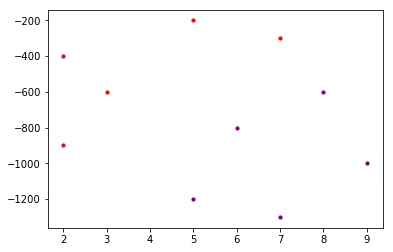

In [404]:
plt.scatter(df[df['color'] == 'red']['length'],
            df[df['color'] == 'red']['width'],
            color='red', s=10)
plt.scatter(df[df['color'] == 'purple']['length'],
            df[df['color'] == 'purple']['width'],
            color='purple', s=10)
plt.show()

In [405]:
color = df['color'].unique()
# y = df.values[:, 0]
y =  np.array(list(map(lambda x: 0 if x == 'red' else 1,
                        df.values[:, 0])))   
x = df.values[:, 1:].astype(np.float32)

x_shift = np.min(x, axis=0)
x = x - x_shift

def normalization(target, val_min, val_max):
    return (target - val_min) / (val_max - val_min)

x_minmax = np.array([np.min(x), np.max(x)])
x = normalization(x, *x_minmax)

bias = np.ones((df.shape[0], 1))
x = np.concatenate((x, bias), 1)

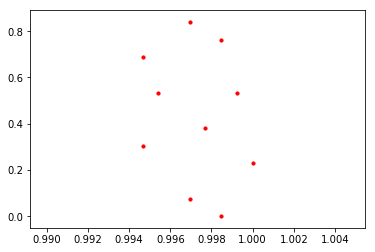

In [406]:
plt.scatter(x[:, 0], x[:, 1],
            color='red', s=10)
# plt.scatter(df[df['color'] == 'purple']['length'],
#             df[df['color'] == 'purple']['width'],
#             color='purple', s=10)
plt.show()

In [407]:
def softmax(predict):
    # softm = np.exp(predict) / np.sum(np.exp(predict))
    softmax = np.power(np.e, predict) / np.sum(np.power(np.e, predict))
    return softmax

def sigmoid(predict):
    # sigmoid = 1 / (1 + np.power(np.e, -predict))
    sigmoid = 1 / (1 + np.exp(-predict))
    return sigmoid

# def log_loss(y, predict):
#     log_loss = -np.sum(y * np.log(predict) +
#                         (1 - y) * np.log(1 - predict)) / y.size

def loss_log(y, predict):
    loss_log = -np.mean(y * np.log(predict) +
                        (1 - y) * np.log(1 - predict))
    return loss_log

In [408]:
weight = np.random.random(x.shape[1])

delta = np.zeros(weight.size, np.float32)
alpha = np.array([0.0001] * weight.size, np.float32)

epochs = 500
error = np.zeros(epochs, np.float32)
for j in range(epochs):
    predict = sigmoid(x @ weight)
    error[j] = loss_log(y, predict)

    for i in range(x.shape[0]):
        predict = sigmoid(x[i] @ weight)
        # delta = delta + (predict - y[i]) * x[i]
        delta += (predict - y[i]) * x[i]

    weight = weight - (delta * alpha)

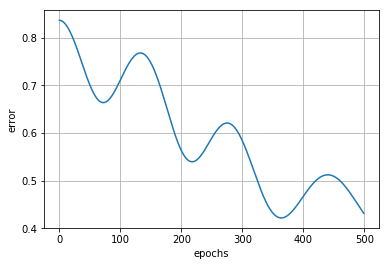

In [409]:

plt.plot(range(epochs), error)
plt.xlabel('epochs')
plt.ylabel('error')
plt.grid()
plt.show()

In [410]:
error[-1]

0.43121538

In [411]:
x[0].min()

0.7639419436454773

[-924.59264546 -923.78603806]


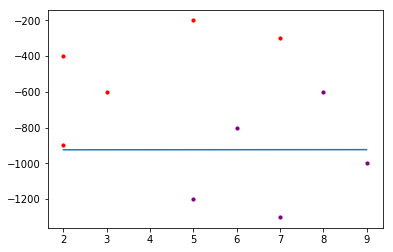

In [412]:
plt.scatter(df[df['color'] == 'red']['length'],
            df[df['color'] == 'red']['width'],
            color='red', s=10)
plt.scatter(df[df['color'] == 'purple']['length'],
            df[df['color'] == 'purple']['width'],
            color='purple', s=10)

divider_x = np.array([df['length'].min(), df['length'].max()])
# divider_x = divider_x - x_shift[0]
divider_x = normalization(divider_x, *x_minmax)
divider_y = -(divider_x * weight[0] + weight[2]) / weight[1]
# divider_y = sigmoid(divider_yn)


# divider_y = divider_y + normalization(x_shift[1], *x_minmax)


divider_y = divider_y * (df['width'].max() -
                            df['width'].min()) +\
                            df['width'].min()
# divider_y = divider_y - x_shift[1]
# divider_y = divider_y + x_shift[1]

print(divider_y)
divider_x = np.array([df['length'].min(), df['length'].max()])
plt.plot(divider_x, divider_y)
plt.show()
